# World Wide Products Inc.
shipping and delivering to a place near you

In [161]:
import numpy as np
import pandas as pd
import datetime
from os import path
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import Ridge, LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor 

### Load the Data Set into Pandas
Import the csv files into Pandas Data Frame

Data retrieved from: https://www.kaggle.com/felixzhao/productdemandforecasting

In [182]:
title = "                                    Historical Product Demand.csv"                              
print(title)
data_raw = pd.read_csv("Historical Product Demand.csv")
data_raw.head()

                                    Historical Product Demand.csv


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


## Exploratory Data Analysis: 
### (1) NaN value Check
 By looking at the data, we know there's missing data in csv files. Hence, let's clean all the missing value.

In [183]:
data = data_raw.dropna()
#Let's only show first 5 elements 
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


Let's double check if there's still any NaN in the data frame. If data.isnull( ).sum( ) == 0 which means there's no more missing data in the data frame

In [184]:
data.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

### (2) Visualization
 Let's evaluate which product are in highest demand in the warehouse by using Wordcloud.
 
Wordcloud uses the visulaization of the word frequency to illustrate it pretty well in this case.

In [185]:
#data size check
data['Product_Code'].size 

1037336

In [186]:
#data size check
data['Warehouse'].size 

1037336

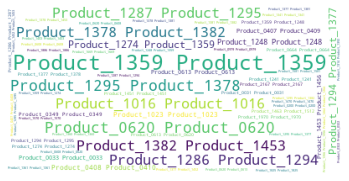

In [167]:
text = data['Product_Code']
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It seems like that Product_1359 has the highest demand overall ! 

### (3) Clean the Data Set

By simply looking at the visulization above, it's a quite mess. Hence let's remove the prefix word "Product" and "Whse". These prefix do not mean too much but only makes the data frame messy.

In [187]:
data['Product_Code'] = data['Product_Code'].str[-4:]
data['Warehouse'] = data['Warehouse'].str[-1:]
data['Category'] = data['Product_Category'].str[-3:]
#Let's only show .head() to avoid the mess
data.head()

<ipython-input-187-d9b1c064be3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Product_Code'] = data['Product_Code'].str[-4:]
<ipython-input-187-d9b1c064be3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Warehouse'] = data['Warehouse'].str[-1:]
<ipython-input-187-d9b1c064be3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Category
0,0993,J,Category_028,2012/7/27,100,028
1,0979,J,Category_028,2012/1/19,500,028
2,0979,J,Category_028,2012/2/3,500,028
3,0979,J,Category_028,2012/2/9,500,028
4,0979,J,Category_028,2012/3/2,500,028


By removing the prefix, it's easier to read the data set. 0993 represents Product_Code 0993 and J represents Warehouse_J.

 Furthermore, let's translate Date into year, month, and day. We need this data category to be the separate integer value to be passed into the function we gunna build later.

In [188]:
data['Date'] = pd.to_datetime(data['Date'], 
        format = '%Y/%m/%d', 
        errors = 'coerce')

<ipython-input-188-196c212114a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'],


In [189]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

<ipython-input-189-04b87369ebf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['Date'].dt.year
<ipython-input-189-04b87369ebf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['Date'].dt.month
<ipython-input-189-04b87369ebf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [190]:
# translate string / object into int
data = data.replace({'\(':'-', '\)':''}, regex=True)

In [191]:
data['Category'] = data['Category'].astype(int)
data['Product_Code'] = data['Product_Code'].astype(int)
data['Order_Demand'] = data['Order_Demand'].astype(str).astype(int)
#data['Price'] = pd.to_numeric(data['Price'])
#data['Order_Demand'].astype(float)
#data['Order_Demand'] = data['Order_Demand'].astype(int)

In [194]:
data = data.drop(columns=['Date'])
data = data.drop(columns=['Product_Category'])

#Show first 5 elements to avoid the mess
data.head()

,Product_Code,Warehouse,Order_Demand,Category,year,month,day
0,993,J,100,28,2012,7,27
1,979,J,500,28,2012,1,19
2,979,J,500,28,2012,2,3
3,979,J,500,28,2012,2,9
4,979,J,500,28,2012,3,2


## Forecasting Model
(1) ARIMA

Let's examine the Product_Code 1274

In [215]:
Code_1274 = data.loc[(data['Product_Code'] == 1274)]
Code_1274.head()

,Product_Code,Warehouse,Order_Demand,Category,year,month,day
65,1274,J,1000,19,2012,1,16
66,1274,J,1000,19,2012,1,24
67,1274,J,1000,19,2012,1,24
71,1274,J,1000,19,2012,1,31
72,1274,J,1000,19,2012,2,7


In [216]:
# Examine the size of Product Code 1274
Code_1274.size

49336

It seems like that Code_1274 is catogeoired to Category_019 and Warehouse J. Then let's re-arrange the data frame by dropping the unnecessary col.

In [217]:
Code_1274 = Code_1274.drop(columns =['Warehouse','Category', 'Product_Code'])
Code_1274.head()

,Order_Demand,year,month,day
65,1000,2012,1,16
66,1000,2012,1,24
67,1000,2012,1,24
71,1000,2012,1,31
72,1000,2012,2,7


Let's forecast the model

In [219]:
from statsmodels.tsa.arima_model import ARIMA

In [220]:
Code_1274

,Order_Demand,year,month,day
65,1000,2012,1,16
66,1000,2012,1,24
67,1000,2012,1,24
71,1000,2012,1,31
72,1000,2012,2,7
...,...,...,...,...
1042133,1000,2016,1,5
1042153,1000,2016,4,25
1042162,2000,2016,7,7
1042167,1000,2016,8,29


In [221]:
Code_1274 = Code_1274.drop(columns =['day', 'month', 'year'])
model = ARIMA(Code_1274, order=(2,1,0))
#model = ARIMA(Code_1274.values.reshape(-1).tolist(), order=(2,1,2))  

C:\Users\17857\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\17857\AppData\Local\Packages\PythonSoftwareFoundation.Pytho

In [222]:
model_fit = model.fit(disp=0)

In [223]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Order_Demand   No. Observations:                 7047
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -77835.557
Method:                       css-mle   S.D. of innovations          15157.415
Date:                Mon, 12 Oct 2020   AIC                         155679.115
Time:                        21:22:31   BIC                         155706.556
Sample:                             1   HQIC                        155688.567
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5676    103.851      0.005      0.996    -202.977     204.113
ar.L1.D.Order_Demand    -0.5082      0.012    -43.849      0.000      -0.531      -0.486
ar.L2.D.Orde

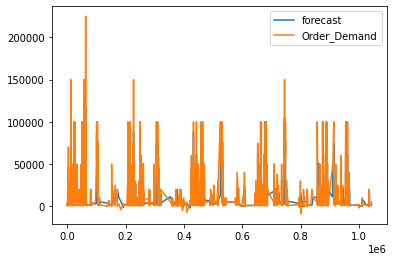

In [224]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [225]:
X = Code_1274
size = int(len(X) * 0.66)
train = X.iloc[:len(X)-12]
test = X.iloc[len(X)-12:]

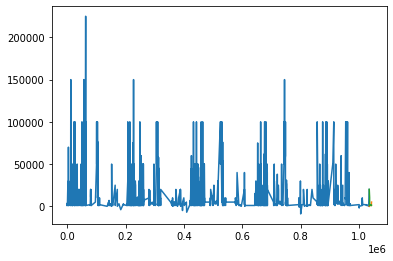

In [226]:
forecast = model_fit.predict(start = len(train), end=len(train)+len(test)-1, typ = 'levels').rename("Predictions") 

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicition')

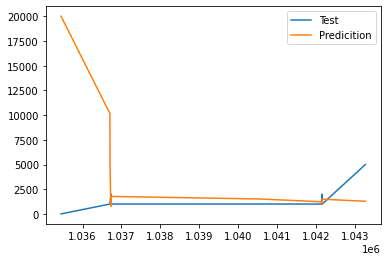

In [227]:
plt.plot(test, label = 'Test')
plt.plot(forecast, label = 'Predicition')
plt.legend(loc = 'best')

The result obtained from ARIMA is a bit confused to me since the test and the prediction should not plot in this way.

### (2) Linear Regression 

Let's try Linear Regression because ARIMA's graph above doesn't seem to be correct. Let's train 80% and test 20%.

In [237]:
data

,Product_Code,Warehouse,Order_Demand,Category,year,month,day
0,993,J,100,28,2012,7,27
1,979,J,500,28,2012,1,19
2,979,J,500,28,2012,2,3
3,979,J,500,28,2012,2,9
4,979,J,500,28,2012,3,2
...,...,...,...,...,...,...,...
1048570,1791,J,1000,6,2016,4,27
1048571,1974,J,1,6,2016,4,27
1048572,1787,J,2500,6,2016,4,28
1048573,901,J,50,23,2016,10,7


80% train && 20% test

In [246]:
x = data[['year','month', 'day']]
y = data[['Order_Demand']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [248]:
Linear_model = linear_model.LinearRegression()
Linear_model.fit(x_train, y_train)

LinearRegression()

In [251]:
y_predict = Linear_model.predict(x_test)
r2_score(y_test,y_predict)

0.59739239503


The predicition accuracy is  ~ 60%. Since the model relationship is between dependent and independent variables, the accuracy of Linear regression is not very accurate. However, 60% accuray rate is good enough to be applied to the function

#### Build the Function

Let's start building the function which could determines the demand for a particular product using other columns as features. In the function below, I would use Product 1274 as an example.

In [276]:
def demand (year, month, day): 

    df = data[(data['year'] == year) & (data['month'] == month) & (data['day'] == day)]

    print("Product 1274's demand on", year,"/", month, "/", day, "is : ", data[['Order_Demand']])

In [281]:
demand(2012,7,27)

Product 1274's demand on 2012 / 7 / 27 is : 100


In [282]:
demand(2016,4,27)

Product 1274's demand on 2016 / 4 / 27 is : 1000


In [283]:
demand(2016,10,7)

Product 1274's demand on 2016 / 10 / 7 is : 50


### In Conlcusion

Instead of using ARIMA, I use Linear Regression which I am more confortable to use and I am more confident on its accuracy rate. Furthermore, I don't think my result from ARIMA is realiable by examining the ARIMA's graph. Hence, I choose to use Linear Regression to build the function.

For demand() function, it takes year,moth,and day as parameter. It returns the Produc 1274's order demand on the date you choose. Three examples are listed above.